## CNN exercise

Your task in this exercise is to create a CNN that can classify 10 classes of images of different types of food. For that we will download and work with a small subset of the [food101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/). The whole dataset contains 101 classes of different types of food, with thousands of images.

### Download and inspect the data

In [1]:
# Get data (10% of labels)
# import zipfile

# Download data
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [2]:
# Move data to data directory
# !mv ./10_food_classes_10_percent.zip ./data/

In [3]:
# Unzip the downloaded file
# zip_ref = zipfile.ZipFile("./data/10_food_classes_10_percent.zip", "r")
# zip_ref.extractall("./data/")
# zip_ref.close()

In [4]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("./data/10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in './data/10_food_classes_10_percent'.
There are 10 directories and 0 images in './data/10_food_classes_10_percent/train'.
There are 0 directories and 75 images in './data/10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in './data/10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in './data/10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in './data/10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in './data/10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in './data/10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in './data/10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in './data/10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in './data/10_food_classes_10_percent/train/hamburger'.

Notice how each of the training directories only has 75 images rather than the full 750 images, which is less than what the test directories have. Usually, this would not make a lot of sense, but in our case we want to demonstrate how powerful transfer learning is in a later notebook.

### Data loaders to prepare data

Now we've downloaded the data, let's use the [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class along with the `flow_from_directory` method to load in our images.

In [5]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "./data/10_food_classes_10_percent/train/"
test_dir = "./data/10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

2025-11-04 10:55:50.612376: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-04 10:55:50.612458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-04 10:55:50.614160: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-04 10:55:50.628575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


Now, we would like to know what the class names are:

In [6]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


We will now create a little helper function to display a random image:

In [7]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


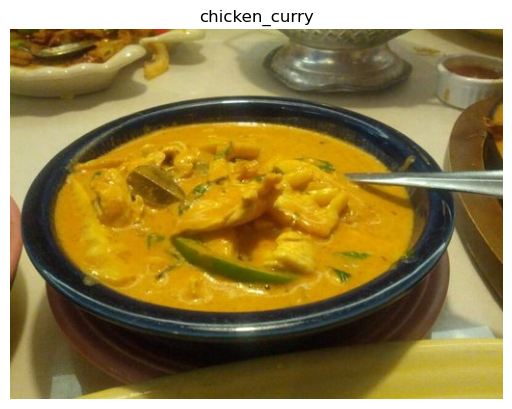

In [8]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

Now its your turn to create and compile a model (model_1). We will fit it further down.
Use an input_shape of (224, 224, 3)

### Possible Solution:

In [10]:
# Create our model
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

2025-11-04 10:55:56.448218: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43604 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:41:00.0, compute capability: 8.6


### Training the model:

In [11]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2025-11-04 10:55:57.671743: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-11-04 10:55:58.383229: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5a4927fc40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-04 10:55:58.383285: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2025-11-04 10:55:58.391975: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762250158.533288 1913716 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 [==============================] - 17s 591ms/step - loss: 2.4422 - accuracy: 0.1067 - val_loss: 2.2989 - val_accuracy: 0.1040
Epoch 2/5
24/24 [==============================] - 5s 231ms/step - loss: 2.2712 - accuracy: 0.1480 - val_loss: 2.2784 - val_accuracy: 0.1396
Epoch 3/5
24/24 [==============================] - 5s 231ms/step - loss: 2.1306 - accuracy: 0.2853 - val_loss: 2.3538 - val_accuracy: 0.1368
Epoch 4/5
24/24 [==============================] - 5s 233ms/step - loss: 1.7400 - accuracy: 0.4360 - val_loss: 2.3216 - val_accuracy: 0.1808
Epoch 5/5
24/24 [==============================] - 5s 232ms/step - loss: 1.0596 - accuracy: 0.7093 - val_loss: 2.6580 - val_accuracy: 0.1756


In [12]:
model_1.evaluate(test_data)

79/79 [==============================] - 4s 52ms/step - loss: 2.6580 - accuracy: 0.1756


[2.658001661300659, 0.17560000717639923]

Let's use the our helper function to plot the loss curves once again:

In [13]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

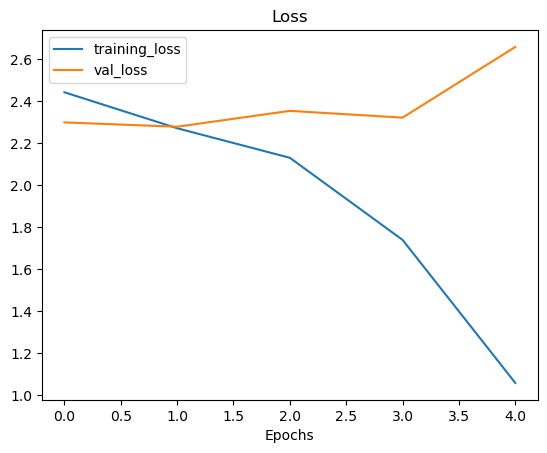

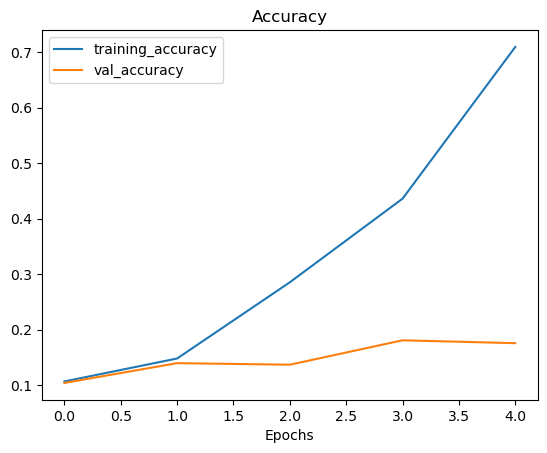

In [14]:
plot_loss_curves(history_1)

Seems the model is overfitting!

Now, try to beat the previous outcome with one or two more models.

In [15]:
# Create our model
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  tf.keras.layers.Dropout(0.5),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [16]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2025-11-04 10:56:40.963020: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


24/24 [==============================] - 9s 251ms/step - loss: 2.3024 - accuracy: 0.1400 - val_loss: 2.2434 - val_accuracy: 0.1712
Epoch 2/5
24/24 [==============================] - 5s 232ms/step - loss: 2.0726 - accuracy: 0.2600 - val_loss: 2.2861 - val_accuracy: 0.1832
Epoch 3/5
24/24 [==============================] - 5s 235ms/step - loss: 1.8291 - accuracy: 0.3533 - val_loss: 2.1538 - val_accuracy: 0.2248
Epoch 4/5
24/24 [==============================] - 5s 224ms/step - loss: 1.5055 - accuracy: 0.5173 - val_loss: 2.2054 - val_accuracy: 0.2280
Epoch 5/5
24/24 [==============================] - 5s 235ms/step - loss: 1.1192 - accuracy: 0.6693 - val_loss: 2.6161 - val_accuracy: 0.2120


In [17]:
# Create our model
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  tf.keras.layers.Dropout(0.5),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [18]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 6s 231ms/step - loss: 2.3152 - accuracy: 0.0973 - val_loss: 2.2495 - val_accuracy: 0.1428
Epoch 2/5
24/24 [==============================] - 5s 226ms/step - loss: 2.0653 - accuracy: 0.2827 - val_loss: 2.1377 - val_accuracy: 0.2312
Epoch 3/5
24/24 [==============================] - 5s 225ms/step - loss: 1.6382 - accuracy: 0.4933 - val_loss: 2.0900 - val_accuracy: 0.2664
Epoch 4/5
24/24 [==============================] - 5s 225ms/step - loss: 1.1659 - accuracy: 0.6800 - val_loss: 2.0700 - val_accuracy: 0.2736
Epoch 5/5
24/24 [==============================] - 6s 236ms/step - loss: 0.7328 - accuracy: 0.8293 - val_loss: 2.2596 - val_accuracy: 0.2696


In [19]:
# Create our model
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  tf.keras.layers.Dropout(0.5),
  Dense(128, activation="relu"),
  Dense(10, activation='softmax')
])

# Compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [20]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 7s 232ms/step - loss: 2.6899 - accuracy: 0.1227 - val_loss: 2.2936 - val_accuracy: 0.1376
Epoch 2/5
24/24 [==============================] - 5s 230ms/step - loss: 2.2646 - accuracy: 0.2013 - val_loss: 2.2789 - val_accuracy: 0.1180
Epoch 3/5
24/24 [==============================] - 5s 227ms/step - loss: 2.1487 - accuracy: 0.2200 - val_loss: 2.2144 - val_accuracy: 0.1876
Epoch 4/5
24/24 [==============================] - 5s 231ms/step - loss: 1.9604 - accuracy: 0.3027 - val_loss: 2.2302 - val_accuracy: 0.1960
Epoch 5/5
24/24 [==============================] - 6s 237ms/step - loss: 1.7717 - accuracy: 0.4107 - val_loss: 2.1655 - val_accuracy: 0.2268


In [21]:
# Create our model
model_5 = Sequential([
  Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(128, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(256, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  tf.keras.layers.Dropout(0.5),
  Dense(64, activation="relu"),
  Dense(10, activation='softmax')
])

# Compile the model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
24/24 [==============================] - 9s 266ms/step - loss: 2.7332 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
24/24 [==============================] - 5s 233ms/step - loss: 2.3022 - accuracy: 0.1013 - val_loss: 2.2938 - val_accuracy: 0.1072
Epoch 3/10
24/24 [==============================] - 5s 232ms/step - loss: 2.2956 - accuracy: 0.1107 - val_loss: 2.2616 - val_accuracy: 0.1580
Epoch 4/10
24/24 [==============================] - 5s 227ms/step - loss: 2.2347 - accuracy: 0.1720 - val_loss: 2.2127 - val_accuracy: 0.1712
Epoch 5/10
24/24 [==============================] - 5s 232ms/step - loss: 2.0704 - accuracy: 0.2387 - val_loss: 2.1774 - val_accuracy: 0.2116
Epoch 6/10
24/24 [==============================] - 5s 230ms/step - loss: 1.7982 - accuracy: 0.3933 - val_loss: 2.1994 - val_accuracy: 0.2236
Epoch 7/10
24/24 [==============================] - 5s 233ms/step - loss: 1.3686 - accuracy: 0.5360 - val_loss: 2.6229 - val_accuracy: 0.2196
Epoch 